# John's EDA

##### Goals:
1. Produce Cases/Deaths scatterplot for a few states over time.
2. Produce animation of cases/deaths over time on bar plot
3. Produce cases/deaths on US Map for different dates
4. Produce population versus cases plots

# 1. Cases/Deaths scatterplot for a few states over time.

In [2]:
#Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as FuncAnimation
import seaborn as sns
from datetime import datetime
#%matplotlib inline   #for static plots
#%matplotlib notebook  #for dynamic plots

In [4]:
#Importing cleaned COVID data
covid = pd.read_pickle('Data_pkl\\covidtrackingproject_kaggleformat_df.pkl') 
#covid.dtypes
covid.head(-5)

,date,state,fips,cases,deaths
0,2020-01-22,Washington,53,1,0
1,2020-01-23,Washington,53,1,0
2,2020-01-24,Washington,53,1,0
3,2020-01-25,Washington,53,1,0
4,2020-01-26,Washington,53,1,0
...,...,...,...,...,...
3199,2020-05-01,New York,36,308314,18610
3200,2020-05-01,Nevada,32,5227,243
3201,2020-05-01,New Mexico,35,3411,123
3202,2020-05-01,New Jersey,34,121190,7538


In [5]:
covid_by_state = covid.drop(['fips'], axis=1)
covid_by_state.head()

,date,state,cases,deaths
0,2020-01-22,Washington,1,0
1,2020-01-23,Washington,1,0
2,2020-01-24,Washington,1,0
3,2020-01-25,Washington,1,0
4,2020-01-26,Washington,1,0


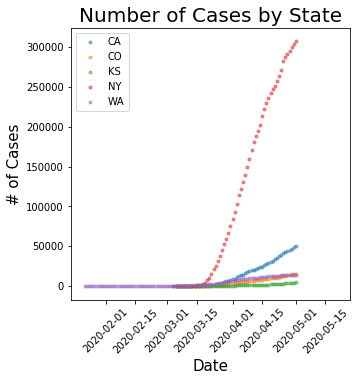

In [6]:
# Cases by State scatterplots
%matplotlib inline
fig, axs = plt.subplots(figsize=(5,5))

ca_date = covid_by_state[covid_by_state.state=='California'].date
co_date = covid_by_state[covid_by_state.state=='Colorado'].date
ks_date = covid_by_state[covid_by_state.state=='Kansas'].date
ny_date = covid_by_state[covid_by_state.state=='New York'].date
wa_date = covid_by_state[covid_by_state.state=='Washington'].date

ca_cases = covid_by_state[covid_by_state.state=='California'].cases
co_cases = covid_by_state[covid_by_state.state=='Colorado'].cases
ks_cases = covid_by_state[covid_by_state.state=='Kansas'].cases
ny_cases = covid_by_state[covid_by_state.state=='New York'].cases
wa_cases = covid_by_state[covid_by_state.state=='Washington'].cases

#scatter of each of the 5 states
axs.scatter(ca_date,ca_cases, alpha = 0.5, marker='.')
axs.scatter(co_date,co_cases, alpha = 0.5, marker='.')
axs.scatter(ks_date,ks_cases, alpha = 0.5, marker='.')
axs.scatter(ny_date,ny_cases, alpha = 0.5, marker='.')
axs.scatter(wa_date,wa_cases, alpha = 0.5, marker='.')

#Labeling
axs.set_title("Number of Cases by State", fontsize=20)
axs.set_ylabel('# of Cases', fontsize=15)
axs.set_xlabel('Date', fontsize=15)
#axs.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)

plt.legend(['CA', 'CO', 'KS', 'NY', 'WA'])

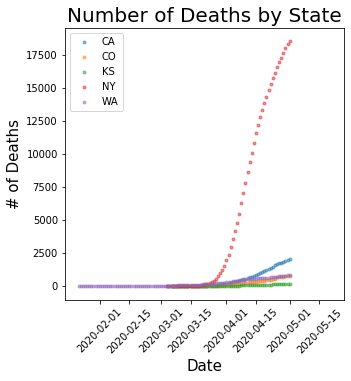

In [7]:
# Deaths by State scatterplots
%matplotlib inline

fig, axs = plt.subplots(figsize=(5,5))

ca_deaths = covid_by_state[covid_by_state.state=='California'].deaths
co_deaths = covid_by_state[covid_by_state.state=='Colorado'].deaths
ks_deaths = covid_by_state[covid_by_state.state=='Kansas'].deaths
ny_deaths = covid_by_state[covid_by_state.state=='New York'].deaths
wa_deaths = covid_by_state[covid_by_state.state=='Washington'].deaths

#scatter of each of the 5 states
axs.scatter(ca_date,ca_deaths, alpha = 0.5, marker='.')
axs.scatter(co_date,co_deaths, alpha = 0.5, marker='.')
axs.scatter(ks_date,ks_deaths, alpha = 0.5, marker='.')
axs.scatter(ny_date,ny_deaths, alpha = 0.5, marker='.')
axs.scatter(wa_date,wa_deaths, alpha = 0.5, marker='.')

#Labeling
axs.set_title("Number of Deaths by State", fontsize=20)
axs.set_ylabel('# of Deaths', fontsize=15)
axs.set_xlabel('Date', fontsize=15)
#axs.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)

plt.legend(['CA', 'CO', 'KS', 'NY', 'WA'])

# 2. Animation of cases/deaths over time on bar plot

In [8]:
#Re-use existing covid dataframe
covid.head()
#covid.date

,date,state,fips,cases,deaths
0,2020-01-22,Washington,53,1,0
1,2020-01-23,Washington,53,1,0
2,2020-01-24,Washington,53,1,0
3,2020-01-25,Washington,53,1,0
4,2020-01-26,Washington,53,1,0


In [9]:
""" #Remove quotes to run, takes a while to load.
#Convert original COVID data to another dataframe format (easier to plot for animation)
#Sums all of the cases on all dates in all states 

#Create a dictionary of {key=states : value=list of cases over time}
states = list(covid.state.unique())
cases={}
for state in states:
    cases_list=[]
    for each in covid.date.unique():
        total = 0
        filtered = covid[(covid.date==each)&(covid['state']==state)]['cases']
        for i in range(0,len(filtered)):
            total += covid[(covid.date==each)&(covid['state']==state)]['cases'].iloc[i]
        cases_list.append(total)
    cases[state]=cases_list

#Convert dictionary above to a dataframe
#Dataframe to have columns of states showing number of cases by date
states = list(covid.state.unique())
data = {'date':list(covid.date.unique())}
for state in states:
    data[state] = cases[state]
cases_by_state = pd.DataFrame(data)

#Sorting dataframe by date
cases_by_state = cases_by_state.sort_values(by='date')
cases_by_state = cases_by_state.reset_index()
cases_by_state = cases_by_state.drop(['index'], axis=1)
cases_by_state.head()

#Convert dataframe to pickle, store for future use
cases_by_state.to_pickle('Data_pkl\cases_by_state.pkl')


In [11]:
""" #Remove quotes to run, takes a while to load.
#Repeat above for deaths reported instead of just cases
#Convert original COVID data to another dataframe format (easier to plot for animation)
#Sums all of the cases on all dates in all states (took John 7+ minutes to load)

#Create a dictionary of {key=states : value=list of cases over time}
states = list(covid.state.unique())
deaths={}
for state in states:
    deaths_list=[]
    for each in covid.date.unique():
        total = 0
        filtered = covid[(covid.date==each)&(covid['state']==state)]['deaths']
        for i in range(0,len(filtered)):
            total += covid[(covid.date==each)&(covid['state']==state)]['deaths'].iloc[i]
        deaths_list.append(total)
    deaths[state]=deaths_list

#Convert dictionary above to a dataframe
#Dataframe to have columns of states showing number of cases by date
states = list(covid.state.unique())
data = {'date':list(covid.date.unique())}
for state in states:
    data[state] = deaths[state]
deaths_by_state = pd.DataFrame(data)

#Sorting dataframe by date
deaths_by_state = deaths_by_state.sort_values(by='date')
deaths_by_state = deaths_by_state.reset_index()
deaths_by_state = deaths_by_state.drop(['index'], axis=1)
deaths_by_state.head()

#Convert dataframe to pickle, store for future use
deaths_by_state.to_pickle('Data_pkl\deaths_by_state.pkl')


In [12]:
#Read pickles created before, use for animation plot
df1 = pd.read_pickle('Data_pkl\\cases_by_state.pkl')
df2 = pd.read_pickle('Data_pkl\\deaths_by_state.pkl')
df1.head()
#df2.head()

,date,Washington,Rhode Island,Michigan,Arizona,California,Florida,Georgia,Illinois,North Carolina,...,South Dakota,Utah,North Dakota,Oklahoma,Massachusetts,American Samoa,Guam,Northern Mariana Islands,Virgin Islands,Puerto Rico
0,2020-01-22,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-24,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-26,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#Prep cases/deaths dataframe for animation plot
df1.index = df1.date              #set date as index
df1 = df1.drop(['date'], axis=1)  #drop extra date column that is not the index
#df1.head()

df2.index = df2.date              #set date as index
df2 = df2.drop(['date'], axis=1)  #drop extra date column that is not the index
#df2.head()

#Transpose data to plot rows separately
df1t = df1.T
df2t = df2.T
#dft1.head()
#dft2.head()

#Sort data by date
df1ts=df1t.sort_index()
df2ts=df2t.sort_index()
#df1ts.head()
#df2ts.head()

In [14]:
#Checking how the dataframes have been prepped
df1ts.head()
#df2ts.head()

date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01
Alabama,0,0,0,0,0,0,0,0,0,0,...,5465,5778,5832,6137,6270,6499,6687,6842,7019,7158
Alaska,0,0,0,0,0,0,0,0,0,0,...,335,337,339,339,341,345,351,355,355,364
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,0,0,0,0,0,0,...,5459,5769,6045,6280,6526,6716,6948,7202,7648,7962
Arkansas,0,0,0,0,0,0,0,0,0,0,...,2276,2465,2741,2829,2941,3017,3111,3192,3255,3321


In [15]:
df1ts.shape
#df2ts.shape

(56, 101)

In [44]:
date=str(df1ts.iloc[:,frameno].name).split()[0:10]
date[0]

'2020-05-01'

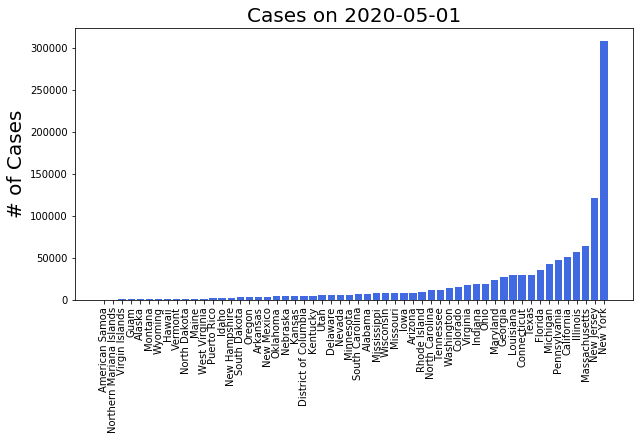

In [54]:
#Test plot for ONE date - Cases

#use inline for static plots as opposed to dynamic plots
%matplotlib inline    
frameno = df1ts.shape[1]-1          #row 50 will be called, selected randomly
column=df1ts.iloc[:,frameno].name         #gets the name of the column which is the date
df1tss=df1ts.sort_values(by=[column])     #sorts from least to most cases
date=str(df1ts.iloc[:,frameno].name).split()[0:10][0]

#Plotting
fig, axs = plt.subplots(figsize=(10,5))
axs.bar(df1tss.index, df1tss.iloc[:,frameno], color='royalblue')   #bar graph
plt.xticks(rotation=90)
axs.set_title("Cases on "+date, fontsize=20)
axs.set_ylabel('# of Cases', fontsize=20)
plt.show()


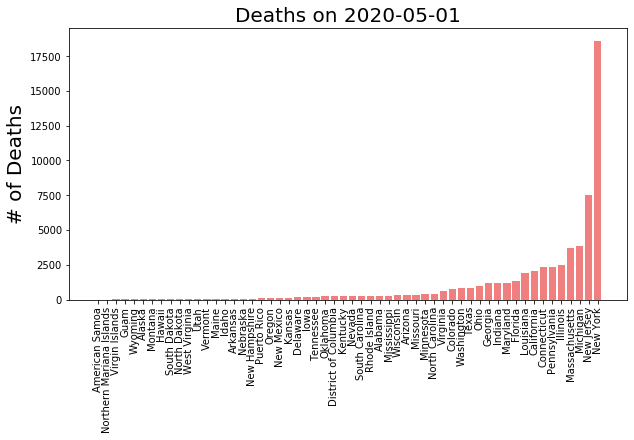

In [53]:
#Test plot for ONE date - Deaths

#use inline for static plots as opposed to dynamic plots
%matplotlib inline    
frameno = df2ts.shape[1]-1          #row 50 will be called, selected randomly
column=df2ts.iloc[:,frameno].name         #gets the name of the column which is the date
df2tss=df2ts.sort_values(by=[column])     #sorts from least to most cases
date=str(df2ts.iloc[:,frameno].name).split()[0:10][0]

#Plotting
fig, axs = plt.subplots(figsize=(10,5))
axs.bar(df2tss.index, df2tss.iloc[:,frameno], color='lightcoral')   #bar graph
plt.xticks(rotation=90)
axs.set_title("Deaths on "+date, fontsize=20)
axs.set_ylabel('# of Deaths', fontsize=20)
plt.show()

<IPython.core.display.Javascript object>


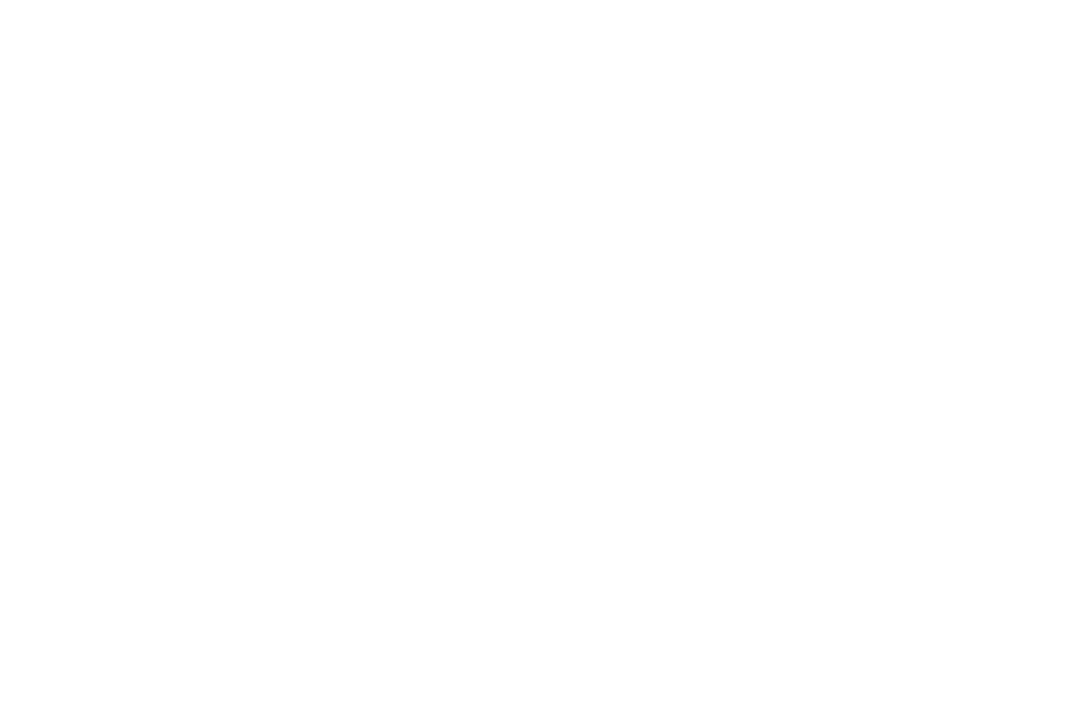

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


<IPython.core.display.Javascript object>


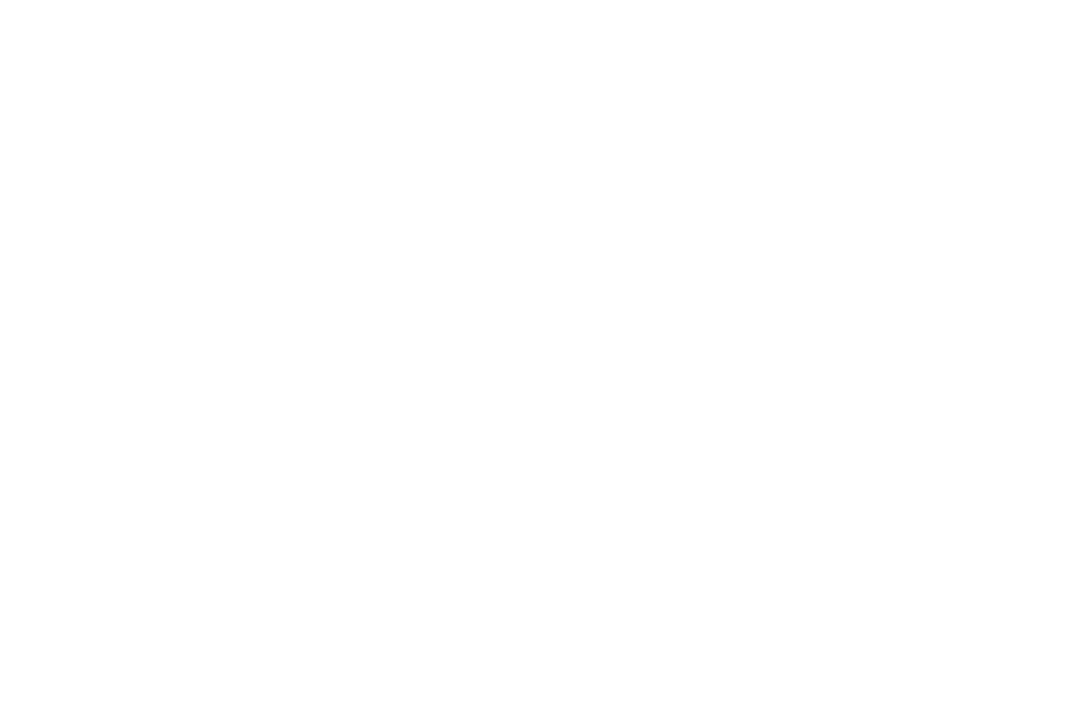

Traceback (most recent call last):
  File "C:\Users\johnl\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\johnl\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [55]:
#Animation Plot of cases over time

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
#use notebook for dynamic plots as opposed to static plots
%matplotlib notebook

#Initial plot set-up
fig, axs = plt.subplots(figsize=(15,10))
plt.xticks(rotation=90, fontsize=10)
axs.set_title("Cases Over Time", fontsize=20)
axs.set_ylabel('# of Cases', fontsize=20)
axs.set_xlabel('State', fontsize=10)

#Did not use init function but can be used to set initial background of plot per frame
def init():
    return

#Create function for EACH frame, input to FuncAnimation method
def animate(frameno):
    column=str(df1ts.iloc[:,frameno].name).split()[0]
    #df1tss=df1ts.sort_index()
    axs.legend([column], loc = 'upper left', shadow=False, fontsize=20)
    return axs.bar(df1ts.index, df1ts.iloc[:,frameno], color='royalblue')

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=df1ts.shape[1]-1 , interval=10, blit=False)

anim.save('plots\\CaseOverTime.gif', writer='ffmpeg')    #saves the animation to a .gif file

plt.show()    #looks better when you save the animation

<IPython.core.display.Javascript object>


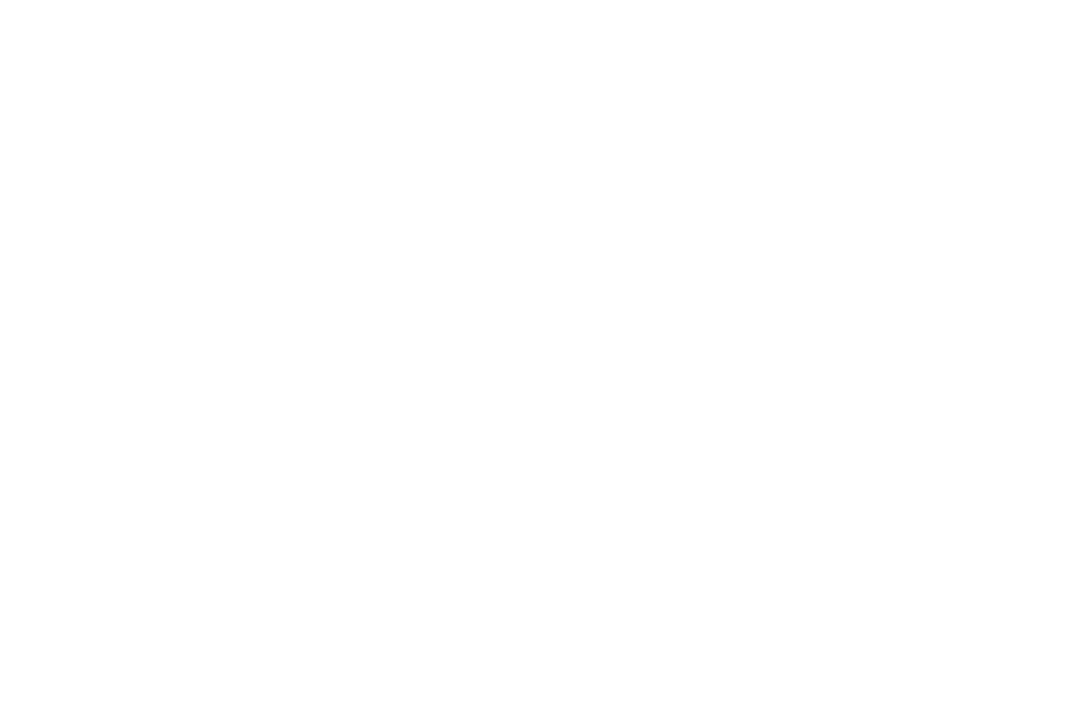

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


<IPython.core.display.Javascript object>


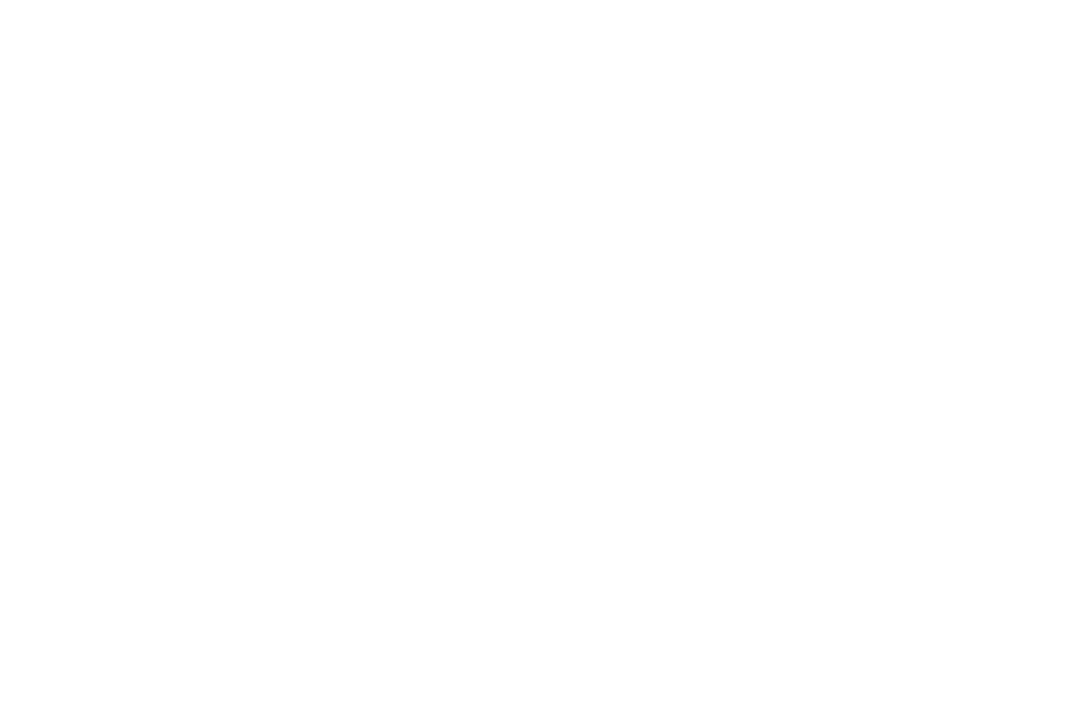

Traceback (most recent call last):
  File "C:\Users\johnl\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\johnl\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [56]:
#Animation Plot of deaths over time

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
#use notebook for dynamic plots as opposed to static plots
%matplotlib notebook

#Initial plot set-up
fig, axs = plt.subplots(figsize=(15,10))
plt.xticks(rotation=90, fontsize=10)
axs.set_title("Deaths Over Time", fontsize=20)
axs.set_ylabel('# of Deaths', fontsize=20)
axs.set_xlabel('State', fontsize=10)

#Did not use init function but can be used to set initial background of plot per frame
def init():
    return

#Create function for EACH frame, input to FuncAnimation method
def animate(frameno):
    column=str(df2ts.iloc[:,frameno].name).split()[0]
    #df2tss=df2ts.sort_index()
    axs.legend([column], loc = 'upper left', shadow=False, fontsize=20)
    return axs.bar(df2ts.index, df2ts.iloc[:,frameno], color='lightcoral')

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=df2ts.shape[1]-1 , interval=10, blit=False)
#deaths start end of february

anim.save('plots\\DeathOverTime.gif', writer='ffmpeg')    #saves the animation to a .gif file

plt.show()    #looks better when you save the animation

# 3. Cases/deaths on US Map for different dates


In [80]:
#Read pickles created before, use for animation plot
df1 = pd.read_pickle('Data_pkl\\cases_by_state.pkl')
df2 = pd.read_pickle('Data_pkl\\deaths_by_state.pkl')
df1.head()
#df2.head()

,date,Washington,Rhode Island,Michigan,Arizona,California,Florida,Georgia,Illinois,North Carolina,...,South Dakota,Utah,North Dakota,Oklahoma,Massachusetts,American Samoa,Guam,Northern Mariana Islands,Virgin Islands,Puerto Rico
0,2020-01-22,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-24,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-26,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
#Prep cases/deaths dataframe for USA Map Plot
df1.index = df1.date              #set date as index
df1 = df1.drop(['date'], axis=1)  #drop extra date column that is not the index
#df1.head()

df2.index = df2.date              #set date as index
df2 = df2.drop(['date'], axis=1)  #drop extra date column that is not the index
#df2.head()

#Transpose data to plot rows separately
df1t = df1.T
df2t = df2.T
#dft1.head()
#dft2.head()

#Sort data by date
df1ts=df1t.sort_index()
df2ts=df2t.sort_index()
#df1ts.head()
#df2ts.head()

In [82]:
df1ts.head()

date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01
Alabama,0,0,0,0,0,0,0,0,0,0,...,5465,5778,5832,6137,6270,6499,6687,6842,7019,7158
Alaska,0,0,0,0,0,0,0,0,0,0,...,335,337,339,339,341,345,351,355,355,364
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,0,0,0,0,0,0,...,5459,5769,6045,6280,6526,6716,6948,7202,7648,7962
Arkansas,0,0,0,0,0,0,0,0,0,0,...,2276,2465,2741,2829,2941,3017,3111,3192,3255,3321


In [83]:
#import modules for map
import geopandas as gpd
import shapefile as shp

# read in .shp file for US map
usa_map = gpd.read_file('.\states_21basic\states.shp')
usa_map = usa_map.sort_values(by="STATE_NAME")
usa_map.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
42,Alabama,43,01,East South Central,AL,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
50,Alaska,51,02,Pacific,AK,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
36,Arizona,37,04,Mountain,AZ,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
46,Arkansas,47,05,West South Central,AR,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
24,California,25,06,Pacific,CA,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."


In [84]:
# merge map and Covid dataframes (c=cases, d=deaths)
covid_mapc = pd.merge(usa_map,df1ts, how='left', left_on=['STATE_NAME'], right_on=df1ts.index)   #creates geopandas df
covid_mapc = covid_mapc.dropna()
covid_mapd = pd.merge(usa_map,df2ts, how='left', left_on=['STATE_NAME'], right_on=df2ts.index)   #creates geopandas df
covid_mapd = covid_mapd.dropna()

# remove Alaska and Hawaii
covid_mapc = covid_mapc [covid_mapc.STATE_ABBR != 'HI']
covid_mapc = covid_mapc [covid_mapc.STATE_ABBR != 'AK']
covid_mapd = covid_mapd [covid_mapd.STATE_ABBR != 'HI']
covid_mapd = covid_mapd [covid_mapd.STATE_ABBR != 'AK']

covid_mapc.head(2)
#covid_mapd.head(2)

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,...,2020-04-22 00:00:00,2020-04-23 00:00:00,2020-04-24 00:00:00,2020-04-25 00:00:00,2020-04-26 00:00:00,2020-04-27 00:00:00,2020-04-28 00:00:00,2020-04-29 00:00:00,2020-04-30 00:00:00,2020-05-01 00:00:00
0,Alabama,43,01,East South Central,AL,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...",0,0,0,0,...,5465,5778,5832,6137,6270,6499,6687,6842,7019,7158
2,Arizona,37,04,Mountain,AZ,"POLYGON ((-114.52063 33.02771, -114.55909 33.0...",0,0,0,0,...,5459,5769,6045,6280,6526,6716,6948,7202,7648,7962


In [85]:
covid_mapc.shape[1]

107

In [86]:
#convert long column date names back to shorter strings
column_names = []    #creating new list of column names to replace old column names
misc = ['STATE_NAME','DRAWSEQ','STATE_FIPS',
        'SUB_REGION','STATE_ABBR','geometry']
for each in misc:
    column_names.append(each)
for each in covid_mapc.columns[6:]:
    each = str(each).split()[0]
    column_names.append(each)
covid_mapc.columns = column_names    #replace old column names with new ones for cases
covid_mapd.columns = column_names    #replace old column names with new ones for deaths
covid_mapc.head(2)

#convert cases to log scale to understand USA map better
for i in range(0,49):
    for j in range(7,covid_mapc.shape[1]):
        if covid_mapc.iloc[i,j] != 0:
            covid_mapc.iloc[i,j] = np.log(covid_mapc.iloc[i,j])
covid_mapc.head(2)

#convert deaths to log scale to understand USA map better
for i in range(0,49):
    for j in range(7,covid_mapd.shape[1]):
        if covid_mapd.iloc[i,j] != 0:
            covid_mapd.iloc[i,j] = np.log(covid_mapd.iloc[i,j])
covid_mapd.head(2)

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,2020-01-22,2020-01-23,2020-01-24,2020-01-25,...,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01
0,Alabama,43,01,East South Central,AL,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...",0,0,0,0,...,5.267858,5.283204,5.283204,5.356586,5.375278,5.402677,5.488938,5.501258,5.594711,5.631212
2,Arizona,37,04,Mountain,AZ,"POLYGON ((-114.52063 33.02771, -114.55909 33.0...",0,0,0,0,...,5.433722,5.517453,5.583496,5.583496,5.616771,5.616771,5.680173,5.717028,5.768321,5.799093


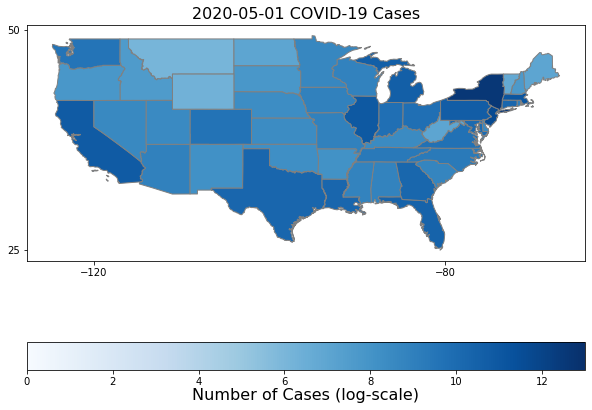

In [87]:
#single plot of most recent data
%matplotlib inline

latest_date=str(df1ts.iloc[:,df1ts.shape[1]-1 ].name).split()[0:10][0]
#latest_date = '2020-05-01'
fig,ax=plt.subplots(figsize=(10,10))
ax = covid_mapc.plot(column=latest_date,
             cmap='Blues',
             ax=ax,
             #alpha=0.5,
             edgecolor='grey',                
             legend=True,
             legend_kwds={'orientation':'horizontal'},
             vmin=0, vmax=13)       
ax.set_title(latest_date+' COVID-19 Cases', fontsize=16)
ax.set_xlabel("Number of Cases (log-scale)",fontsize=16,  labelpad=110)
ax.xaxis.set_major_locator(plt.MaxNLocator(1))
ax.yaxis.set_major_locator(plt.MaxNLocator(1))

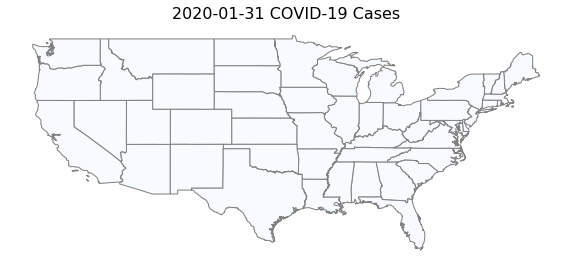

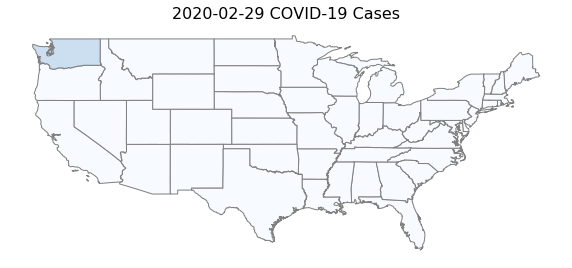

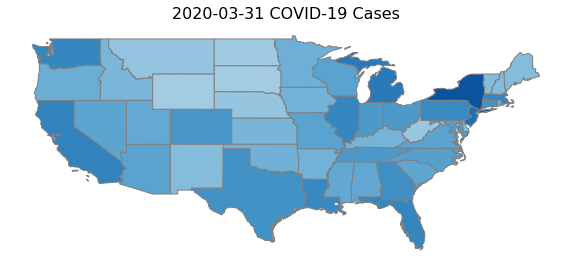

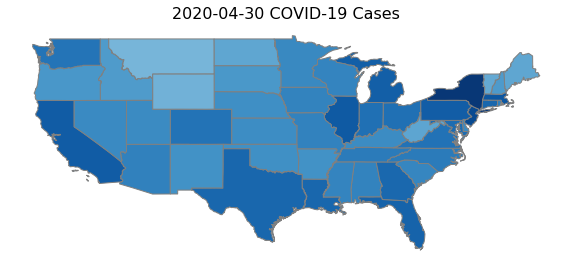

In [90]:
# create choropleth map for Covid-19 cases
dates=['2020-01-31', '2020-02-29','2020-03-31','2020-04-30']   #dates we want to plot

# create choropleth map for Covid-19 cases
%matplotlib inline

for each in dates:
    fig,ax=plt.subplots(figsize=(10,10))
    ax = covid_mapc.plot(column=each,
                 cmap='Blues',
                 ax=ax,
                 #alpha=0.5,
                 edgecolor='grey',                
                 #legend=False,
                 #legend_kwds={'orientation':'horizontal'},
                 vmin=0, vmax=13)       
    ax.set_title(each+' COVID-19 Cases', fontsize=16)
    ax.set_xlabel("Number of Cases (log-scale)",fontsize=16,  labelpad=110)
    ax.xaxis.set_major_locator(plt.MaxNLocator(1))
    ax.yaxis.set_major_locator(plt.MaxNLocator(1))

    #ax.set_legendscale("log")
    #ax.legend(frameon=False)
    #leg = ax.get_legend()
    #leg.set_bbox_to_anchor((0., 0., 1, 1))
    ax.set_axis_off()

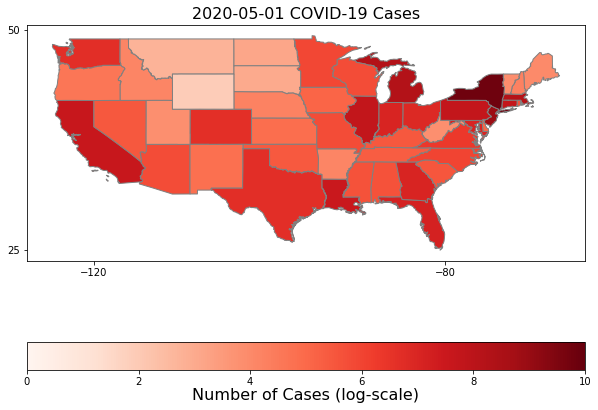

In [89]:
#single plot of most recent data
%matplotlib inline

latest_date=str(df2ts.iloc[:,df2ts.shape[1]-1 ].name).split()[0:10][0]
#latest_date = '2020-04-25'
fig,ax=plt.subplots(figsize=(10,10))
ax = covid_mapd.plot(column=latest_date,
             cmap='Reds',
             ax=ax,
             #alpha=0.5,
             edgecolor='grey',                
             legend=True,
             legend_kwds={'orientation':'horizontal'},
             vmin=0, vmax=10)       
ax.set_title(latest_date+' COVID-19 Cases', fontsize=16)
ax.set_xlabel("Number of Cases (log-scale)",fontsize=16,  labelpad=110)
ax.xaxis.set_major_locator(plt.MaxNLocator(1))
ax.yaxis.set_major_locator(plt.MaxNLocator(1))

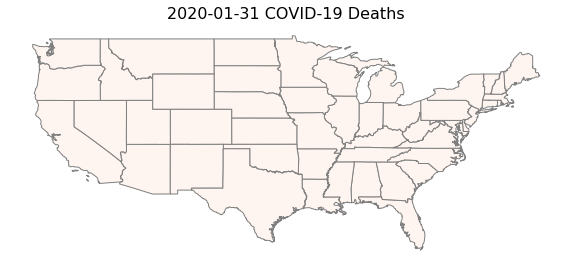

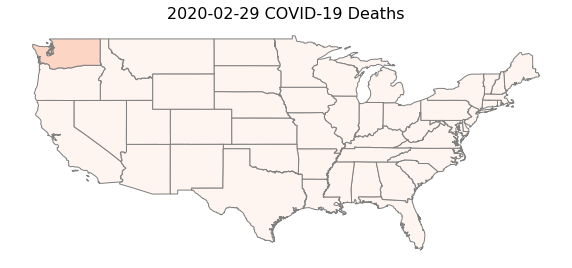

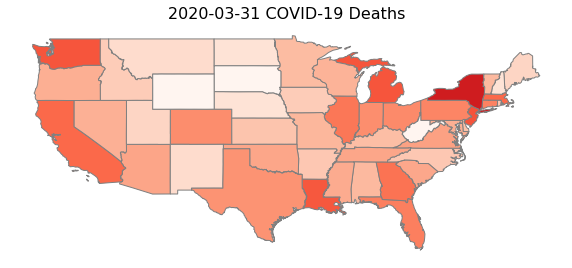

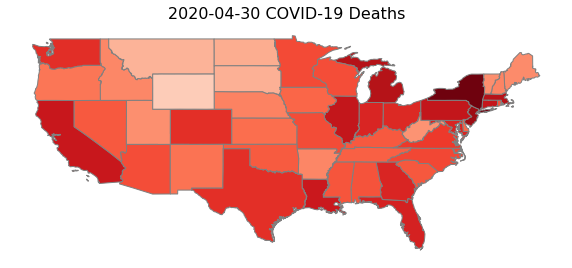

In [91]:
# create choropleth map for Covid-19 deaths
dates=['2020-01-31', '2020-02-29','2020-03-31','2020-04-30']   #dates we want to plot

# create choropleth map for Covid-19 deaths
%matplotlib inline

for each in dates:
    fig,ax=plt.subplots(figsize=(10,10))
    ax = covid_mapd.plot(column=each,
                 cmap='Reds',
                 ax=ax,
                 #alpha=0.5,
                 edgecolor='grey',                
                 #legend=True,
                 #legend_kwds={'orientation':'horizontal'},
                 vmin=0, vmax=10)       
    ax.set_title(each+' COVID-19 Deaths', fontsize=16)
    ax.set_xlabel("Number of Deaths (log-scale)",fontsize=16,  labelpad=110)
    ax.xaxis.set_major_locator(plt.MaxNLocator(1))
    ax.yaxis.set_major_locator(plt.MaxNLocator(1))

    #ax.set_legendscale("log")
    #ax.legend(frameon=False)
    #leg = ax.get_legend()
    #leg.set_bbox_to_anchor((0., 0., 1, 1))
    ax.set_axis_off()

# 4. Population versus cases plots

In [92]:
#Importing cleaned COVID data
covid = pd.read_pickle('Data_pkl\\covidtrackingproject_kaggleformat_df.pkl') 
pop_by_state = pd.read_csv("Data_Raw\\State_Populations.csv")#, index_col=['date'])

#covid.dtypes
covid.head()
#pop_by_state.head()

,date,state,fips,cases,deaths
0,2020-01-22,Washington,53,1,0
1,2020-01-23,Washington,53,1,0
2,2020-01-24,Washington,53,1,0
3,2020-01-25,Washington,53,1,0
4,2020-01-26,Washington,53,1,0


In [93]:
pop_by_state.head()

,state,population
0,California,39776830
1,Texas,28704330
2,Florida,21312211
3,New York,19862512
4,Pennsylvania,12823989


In [94]:
latest = max(covid.date.unique())
latest_date = latest.astype(str).split()[0][0:10]
latest_covid = covid[covid.date==latest]
latest_covid.head()

,date,state,fips,cases,deaths
3153,2020-05-01,Kansas,20,4449,130
3154,2020-05-01,Idaho,16,2015,63
3155,2020-05-01,Illinois,17,56055,2457
3156,2020-05-01,Indiana,18,18630,1175
3157,2020-05-01,Kentucky,21,4708,240


In [95]:
latest_covid_pop = pd.merge(latest_covid,pop_by_state, how='left', left_on=['state'], right_on=['state'])
latest_covid_pop.head()

,date,state,fips,cases,deaths,population
0,2020-05-01,Kansas,20,4449,130,2918515.0
1,2020-05-01,Idaho,16,2015,63,1753860.0
2,2020-05-01,Illinois,17,56055,2457,12768320.0
3,2020-05-01,Indiana,18,18630,1175,6699629.0
4,2020-05-01,Kentucky,21,4708,240,4472265.0


Text(0.5, 0, 'Population')

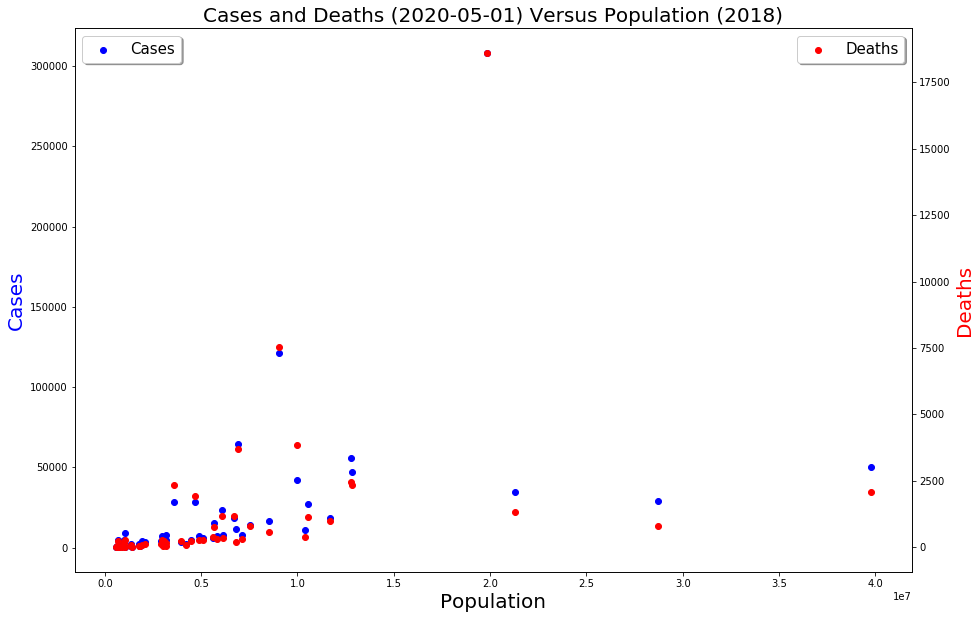

In [96]:
# Population vs Cases Scatterplots
%matplotlib inline

fig, axs = plt.subplots(figsize=(15,10))

#scatterplots
axs.scatter(latest_covid_pop.population, latest_covid_pop.cases, color='b')
axs2 = axs.twinx()
axs2.scatter(latest_covid_pop.population, latest_covid_pop.deaths, color='r')
axs.legend(['Cases'], loc = 'upper left', shadow=True, fontsize=15)
axs2.legend(['Deaths'], shadow=True, fontsize=15)

#Labeling
axs.set_title("Cases and Deaths ("+ latest_date + ") Versus Population (2018)", fontsize=20)
axs.set_ylabel('Cases', fontsize=20, color = 'b')
axs2.set_ylabel('Deaths', fontsize=20, color = 'r')
axs.set_xlabel('Population', fontsize=20)
#axs.xaxis.set_major_locator(plt.MaxNLocator(5))
